In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn import preprocessing as pr
#import ppx
#import rpy2.robjects as ro
#from rpy2.robjects.packages import importr
#from rpy2.robjects import pandas2ri
#pandas2ri.activate()

In [2]:
training= pd.read_csv("Train_VehCSV.csv")
trainscaled=pd.DataFrame(training, columns= training.columns)
scaler=pr.MinMaxScaler()
trainscaled[['WeeklyWages', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek', 'InitialIncurredCalimsCost', 'UltimateIncurredClaimCost']]=scaler.fit_transform(trainscaled[['WeeklyWages', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek', 'InitialIncurredCalimsCost', 'UltimateIncurredClaimCost']])

First we start with the data representation to understad the how the data is given and study any particular characterstics

Year_Reported
1988    AxesSubplot(0.125,0.125;0.775x0.755)
1989    AxesSubplot(0.125,0.125;0.775x0.755)
1990    AxesSubplot(0.125,0.125;0.775x0.755)
1991    AxesSubplot(0.125,0.125;0.775x0.755)
1992    AxesSubplot(0.125,0.125;0.775x0.755)
1993    AxesSubplot(0.125,0.125;0.775x0.755)
1994    AxesSubplot(0.125,0.125;0.775x0.755)
1995    AxesSubplot(0.125,0.125;0.775x0.755)
1996    AxesSubplot(0.125,0.125;0.775x0.755)
1997    AxesSubplot(0.125,0.125;0.775x0.755)
1998    AxesSubplot(0.125,0.125;0.775x0.755)
1999    AxesSubplot(0.125,0.125;0.775x0.755)
2000    AxesSubplot(0.125,0.125;0.775x0.755)
2001    AxesSubplot(0.125,0.125;0.775x0.755)
2002    AxesSubplot(0.125,0.125;0.775x0.755)
2003    AxesSubplot(0.125,0.125;0.775x0.755)
2004    AxesSubplot(0.125,0.125;0.775x0.755)
2005    AxesSubplot(0.125,0.125;0.775x0.755)
2006    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

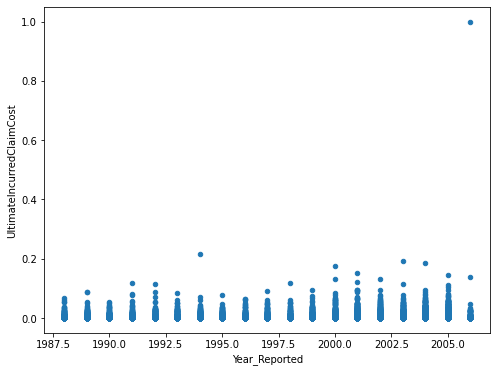

In [3]:
fig, ax = plt.subplots(figsize=(8,6))
trainscaled.groupby('Year_Reported').plot(kind='scatter', x = "Year_Reported", y = "UltimateIncurredClaimCost", ax=ax)
#plt.show()

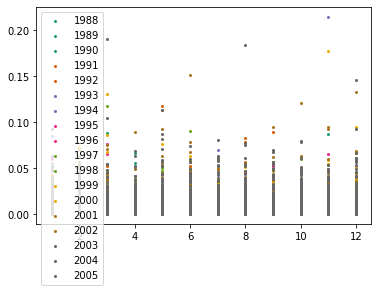

In [4]:
jet= plt.get_cmap('Dark2')
colors = iter(jet(np.linspace(0,1,18)))
for i in list(range(min(trainscaled['Year_Reported']),max(training['Year_Reported']))):
    plt.scatter(x = 'Month_Reported', y='UltimateIncurredClaimCost', data = trainscaled[trainscaled['Year_Reported']==i],label=i, 
    color=next(colors),s=4)
    plt.legend()
    #plt.show()

<AxesSubplot:xlabel='Year_Reported'>

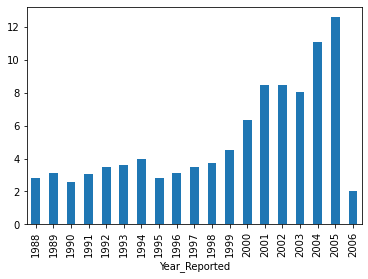

In [5]:
trainscaled.groupby('Year_Reported').UltimateIncurredClaimCost.sum().plot(kind='bar')

<AxesSubplot:xlabel='Year_Reported'>

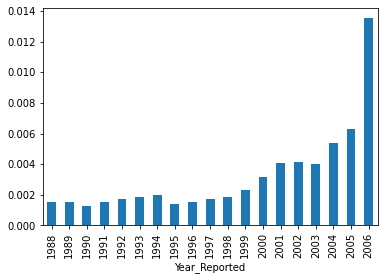

In [6]:
trainscaled.groupby('Year_Reported').UltimateIncurredClaimCost.mean().plot(kind='bar')

So What we observed here is that total sum of claims was highest in 2005 and lowest in 2006. However when we checked mean of claims we found that 2006 had the highest number of claims cost. This reflects that 2006 have very les number of policies compared to previous years and hence distributing more starain per policy.

array([[<AxesSubplot:xlabel='Year_Reported'>,
        <AxesSubplot:xlabel='Year_Reported'>,
        <AxesSubplot:xlabel='Year_Reported'>,
        <AxesSubplot:xlabel='Year_Reported'>],
       [<AxesSubplot:xlabel='Year_Reported'>,
        <AxesSubplot:xlabel='Year_Reported'>,
        <AxesSubplot:xlabel='Year_Reported'>,
        <AxesSubplot:xlabel='Year_Reported'>],
       [<AxesSubplot:xlabel='Year_Reported'>,
        <AxesSubplot:xlabel='Year_Reported'>,
        <AxesSubplot:xlabel='Year_Reported'>,
        <AxesSubplot:xlabel='Year_Reported'>],
       [<AxesSubplot:xlabel='Year_Reported'>,
        <AxesSubplot:xlabel='Year_Reported'>,
        <AxesSubplot:xlabel='Year_Reported'>,
        <AxesSubplot:xlabel='Year_Reported'>]], dtype=object)

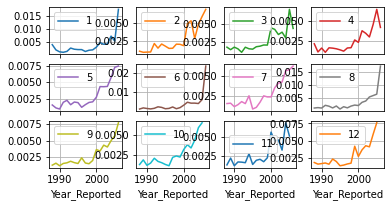

In [7]:
trainscaled.groupby(['Year_Reported','Month_Reported'])['UltimateIncurredClaimCost'].mean().unstack().plot(kind='line',subplots=True, grid=True,
layout=(4,4))

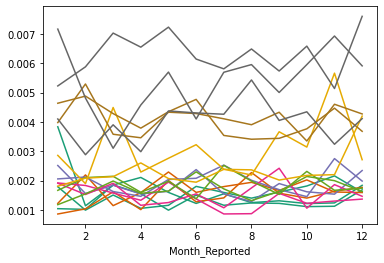

In [8]:
jet= plt.get_cmap('Dark2')
colors = iter(jet(np.linspace(0,1,18)))
for i in list(range(min(trainscaled['Year_Reported']),max(training['Year_Reported']))):
    trainscaled[trainscaled['Year_Reported']==i].groupby('Month_Reported').UltimateIncurredClaimCost.mean().plot(kind='line', color=next(colors))
    #plt.show()

In [9]:
## Checking if there are duplicates
len(trainscaled['ClaimNumber'])!=len(set(trainscaled['ClaimNumber']))

True

In [10]:
trainscaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36176 entries, 0 to 36175
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ClaimNumber                36176 non-null  object 
 1   DateTimeOfAccident         36176 non-null  object 
 2   Day_Reported               36176 non-null  int64  
 3   Month_Reported             36176 non-null  int64  
 4   Year_Reported              36176 non-null  int64  
 5   Age                        36176 non-null  int64  
 6   Gender                     36176 non-null  object 
 7   MaritalStatus              36154 non-null  object 
 8   DependentChildren          36176 non-null  int64  
 9   DependentsOther            36176 non-null  int64  
 10  WeeklyWages                36120 non-null  float64
 11  PartTimeFullTime           36176 non-null  object 
 12  HoursWorkedPerWeek         36127 non-null  float64
 13  DaysWorkedPerWeek          36176 non-null  flo

In [11]:
trainscaled.describe()

,Day_Reported,Month_Reported,Year_Reported,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost
count,36176.000000,36176.000000,36176.000000,36176.000000,36176.000000,36176.000000,36120.000000,36127.000000,36176.000000,36176.000000,36176.000000
mean,15.956297,6.596666,1996.596500,33.795196,0.121296,0.009537,0.055426,0.059011,0.650966,0.009328,0.002690
std,8.860519,3.394674,5.196147,12.114729,0.525395,0.106163,0.032534,0.019522,0.091180,0.021956,0.008765
min,1.000000,1.000000,1988.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,4.000000,1992.000000,23.000000,0.000000,0.000000,0.026547,0.059375,0.666667,0.000842,0.000200
50%,16.000000,7.000000,1997.000000,32.000000,0.000000,0.000000,0.052343,0.059375,0.666667,0.002408,0.000808
75%,24.000000,10.000000,2001.000000,43.000000,0.000000,0.000000,0.066569,0.062500,0.666667,0.011445,0.002003
max,31.000000,12.000000,2006.000000,79.000000,9.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
trainscaled.shape

(36176, 17)

In [13]:
trainscaled.isnull().sum()

ClaimNumber                   0
DateTimeOfAccident            0
Day_Reported                  0
Month_Reported                0
Year_Reported                 0
Age                           0
Gender                        0
MaritalStatus                22
DependentChildren             0
DependentsOther               0
WeeklyWages                  56
PartTimeFullTime              0
HoursWorkedPerWeek           49
DaysWorkedPerWeek             0
ClaimDescription              0
InitialIncurredCalimsCost     0
UltimateIncurredClaimCost     0
dtype: int64

In [14]:
trainscaled['WeeklyWages']=trainscaled['WeeklyWages'].fillna(trainscaled['WeeklyWages'].mean())
trainscaled['HoursWorkedPerWeek']=trainscaled['HoursWorkedPerWeek'].fillna(trainscaled['HoursWorkedPerWeek'].mean())
trainscaled['MaritalStatus']=trainscaled['MaritalStatus'].fillna(trainscaled['MaritalStatus'].mode()[0])

In [15]:
trainscaled.isnull().sum()

ClaimNumber                  0
DateTimeOfAccident           0
Day_Reported                 0
Month_Reported               0
Year_Reported                0
Age                          0
Gender                       0
MaritalStatus                0
DependentChildren            0
DependentsOther              0
WeeklyWages                  0
PartTimeFullTime             0
HoursWorkedPerWeek           0
DaysWorkedPerWeek            0
ClaimDescription             0
InitialIncurredCalimsCost    0
UltimateIncurredClaimCost    0
dtype: int64

So this means we also have duplicates, that mean one plociholder may have claimed again

_________________________________Linear Regression_____________________________________________

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [17]:
lrmodel=smf.ols('UltimateIncurredClaimCost ~ Age + InitialIncurredCalimsCost + DaysWorkedPerWeek + HoursWorkedPerWeek + WeeklyWages + DependentsOther + DependentChildren + C(MaritalStatus) + C(Gender) + C(PartTimeFullTime)',data= trainscaled)
fitted_model=lrmodel.fit()
print(fitted_model.summary())
fitted_model.rsquared_adj

                                OLS Regression Results                               
Dep. Variable:     UltimateIncurredClaimCost   R-squared:                       0.168
Model:                                   OLS   Adj. R-squared:                  0.168
Method:                        Least Squares   F-statistic:                     608.4
Date:                       Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                               16:24:09   Log-Likelihood:             1.2336e+05
No. Observations:                      36176   AIC:                        -2.467e+05
Df Residuals:                          36163   BIC:                        -2.466e+05
Df Model:                                 12                                         
Covariance Type:                   nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

0.16768897426182106

In [18]:
t_columns=["Age" , "InitialIncurredCalimsCost" , "DaysWorkedPerWeek" , "HoursWorkedPerWeek" , "WeeklyWages" , "DependentsOther" , "DependentChildren"]
def subsets(numbers):
    if numbers == []:
        return [[]]
    x = subsets(numbers[1:])
    return x + [[numbers[0]] + y for y in x]
 
# wrapper function
def subsets_of_given_size(numbers, n):
    return [x for x in subsets(numbers) if len(x)==n]
    print(subsets_of_given_size(numbers, n))

t_sub=subsets(t_columns)
len(t_sub)
t_sub=t_sub[1:128]
#t_sub=pd.DataFrame(t_sub, columns=['A1', 'A2', 'A3', 'A4', 'A5', 'A6','A7'])
#t_sub.fillna("na", inplace=True)
#print(t_sub)

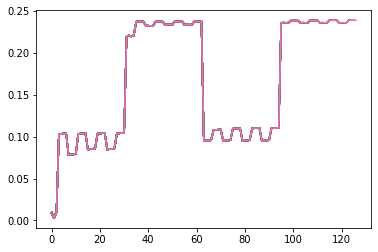

In [19]:
rsqr=[]
for i in range(len(t_sub)):
    predictors=trainscaled[t_sub[i]]
    target=trainscaled['UltimateIncurredClaimCost']
    lrmodel=sm.OLS(target,predictors)
    fitted_model=lrmodel.fit()
    p=fitted_model.rsquared_adj
    rsqr.append(p)
    plt.plot(rsqr)
    #print(fitted_model.summary())
   
#lrmodel=sm.OLS(trainscaled['Age'],trainscaled['UltimateIncurredClaimCost']).fit()
#for i in range(1023):
    #trainscaled.iloc[i]
    #A1=print(A1)
    #lrmodel=smf.ols('UltimateIncurredClaimCost ~ t_sub.iloc[67].A1 )',data= trainscaled)
    #fitted_model=lrmodel.fit()
    #print(fitted_model.summary())
        


R square statistic explains the proportion of variance explained by the model. So, if the value is closr to 1 the better it is.
Another statistic is Residual standard error, this explains the proportion of variance unexplained by the model. R square is also equls to TSS- RSS

In [20]:
# from sklearn.linear_model import LinearRegression
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import PolynomialFeatures
# degree=2
# polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
# linear_regression = LinearRegression()
# pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression)])
# for i in range(len(t_sub)):
#     predictors=trainscaled[t_sub[i]]
#     target=trainscaled['UltimateIncurredClaimCost']
#     lrmodel= pipeline.fit(predictors, target)
#     print(lrmodel)
#     #fitted_model=lrmodel.fit()
#     #p=lrmodel.rsquared_adj
#     #rsqr.append(p)
#     #plt.plot(rsqr)


___________________________________________TREE_BASED METHODS________________________________________________

In [28]:
predictors=trainscaled[t_sub[126]]
target=trainscaled['UltimateIncurredClaimCost']

BAGGING

In [30]:
from matplotlib.pyplot import plot
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import export_graphviz
import graphviz
from sklearn import tree
rsqr=[]
trees=np.arange(100,200,10).tolist()
for i in trees:
    model=BaggingRegressor(n_estimators= i,verbose=1,n_jobs=-1,random_state=56)
    fitted=model.fit(predictors,target)
    p=model.score(predictors,target)
    rsqr.append(p)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    8.7s remaining:    8.7s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    8.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    1.2s remaining:    1.2s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    1.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    5.9s remaining:    5.9s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    6.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    1.4s remaining:    1.4s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    1.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Don

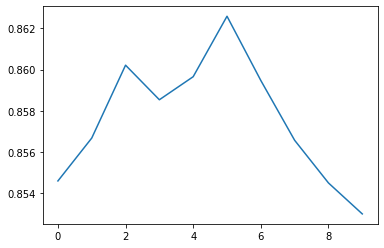

In [31]:
plt.plot(rsqr)

In [43]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators': [150],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(predictors, target)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(predictors, target))
#print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, Y_test))
print('Best R^2 Score Through Grid Search : %.3f'%bagging_regressor_grid.best_score_)
print('Best Parameters : ',bagging_regressor_grid.best_params_)



Fitting 3 folds for each of 16 candidates, totalling 48 fits


KeyboardInterrupt: 

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
ranforreg= RandomForestRegressor(n_estimators= 500, n_jobs= -1, random_state= 1)
ranforreg.fit(predictors,target)
print('Training Coefficient of r^2: %.3f'%ranforreg.score(predictors,target))

Training Coefficient of r^2: 0.845


In [ ]:
# parameters = {
#     'max_depth': [80, 90, 100],
#     'n_estimators': [50, 80, 100]
# }
# gridforest = GridSearchCV(ranforreg, parameters, cv = 3, n_jobs = -1, verbose = 1)
# gridforest.fit(predictors, target)
# gridforest.best_params_



Fitting 3 folds for each of 9 candidates, totalling 27 fits


{'max_depth': 90, 'n_estimators': 50}

In [ ]:
# print('Train R^2 Score : %.3f'%gridforest.best_estimator_.score(predictors, target))
# #print('Test R^2 Score : %.3f'%gridforest.best_estimator_.score(X_test, Y_test))
# print('Best R^2 Score Through Grid Search : %.3f'%gridforest.best_score_)
# print('Best Parameters : ',gridforest.best_params_)

Train R^2 Score : 0.805
Best R^2 Score Through Grid Search : -0.134
Best Parameters :  {'max_depth': 90, 'n_estimators': 50}


GRADIENT BOOSTING

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [40]:
gbr = GradientBoostingRegressor(n_estimators=1000, verbose= 1, random_state= 56, learning_rate=0.01)
gbr.fit(predictors, target)
gbr.score(predictors,target)


      Iter       Train Loss   Remaining Time 
         1           0.0001           31.18s
         2           0.0001           33.99s
         3           0.0001           32.58s
         4           0.0001           31.86s
         5           0.0001           30.62s
         6           0.0001           29.95s
         7           0.0001           29.05s
         8           0.0001           28.48s
         9           0.0001           28.15s
        10           0.0001           28.76s
        20           0.0001           26.09s
        30           0.0001           24.66s
        40           0.0001           25.10s
        50           0.0001           25.24s
        60           0.0001           25.40s
        70           0.0001           24.54s
        80           0.0001           24.05s
        90           0.0001           23.66s
       100           0.0001           23.12s
       200           0.0001           19.66s
       300           0.0001           16.74s
       40

0.37477815285565996

In [ ]:
# mass=importr("MASS")
# utils=importr('utils')
# utils.install_packages('ISLR2', repos="https://cloud.r-project.org")
# utils.install_packages('leaps', repos="https://cloud.r-project.org")
# islr2=importr('ISLR2')
# leaps=importr('leaps')